# 165_A / GRAMMER / Spindel-Antrieb
Status 12-Juni-2019
Gerrit Kocherscheidt

Bearbeitung der Anfrage von Grammer (s. Besuchsbericht Hans 11-Jun-2019)
## Abschätzungen zur Spindel

Formeln siehe:

https://www.schweizer-fn.de/maschinenelemente/bewegungsschrauben/bewegungsschrauben.php

In [1]:
import numpy as np
from MotorCalc import *

F_max = 1000    #N; max force needed
v_max = 10000/60   #mm/s; max linear movement speed
a_max = 80.4    #mm/s^2; max linear acceleration
s_total = 50    #mm; total travel distance

spindle_pitch = 5.5     #mm/revolution
spindle_dia = 8         #mm; diameter of spindle 

# pitch angle degree
pitch_angle_deg = np.arctan2(spindle_pitch,spindle_dia*np.pi)*180/np.pi

# max motor speed (RPM)
n_max = v_max/spindle_pitch*60

# flank angle (degree)
flank_angle_rad = 50/180*np.pi  #°

#friction number
mu_fric = 0.23

#friction angle (degree)
friction_angle_deg = np.arctan2(mu_fric,np.cos(flank_angle_rad/2))*180/np.pi

#Drive torque estimate without friction
M_drive = F_max*v_max/(np.pi*n_max/30)

#Friction torque component estimate
M_friction = F_max*spindle_dia/2*mu_fric

print("pitch angle = {:0.3f}°".format(pitch_angle_deg))
print("n_max = {:0.1f}RPM".format(n_max))
print("friction angle = {:0.3f}°".format(friction_angle_deg))
print("estimated M_drive = {:0.2f}mNm".format(M_drive))
print("estimated M_friction = {:0.2f}mNm".format(M_friction))
print("relevant total torque = {:0.2f}mNm".format(M_drive+M_friction))




pitch angle = 12.344°
n_max = 1818.2RPM
friction angle = 14.240°
estimated M_drive = 875.35mNm
estimated M_friction = 920.00mNm
relevant total torque = 1795.35mNm


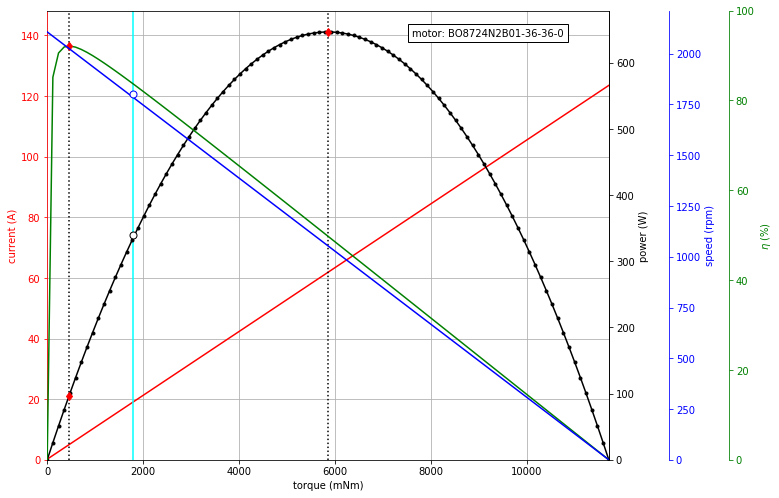

R = 0.17 Ohm
U = 21.00 V
I_0 = 0.20 A
k_M = 95.00 mNm/A
n = 1783.7 RPM
I = 19.1 A
W_mech = 336.22 W
W_loss = 65.87 W


In [21]:
U_N_KN = 36
I_0_KN = 0.2
M_WP=1.8
n_WP=1800
motor_name_supplier = 'BO8724N2B01-36-36-0'
motor_name_KOCO = 'BO8724N2B01-36-36-0'
#Terminal resistance
R=0.17
#Operating voltage
U=21
#No load current
# I_0 = I_0_KN / U_N_KN * U
I_0 = I_0_KN
#Torque konstant
k_M = 0.095
m=CDCMotor(U_N=U,R=R,I_0=I_0,k_M=k_M, M_WP = M_WP, n_WP = n_WP, motor_name=motor_name_KOCO)
m.plotCurves()

#Print values
print('R = {:0.2f} Ohm'.format(R))
print('U = {:0.2f} V'.format(U))
print('I_0 = {:0.2f} A'.format(I_0))
print('k_M = {:0.2f} mNm/A'.format(k_M*1000.0))
print('n = {:0.1f} RPM'.format(m.calc_n_from_M(M_WP)))
print('I = {:0.1f} A'.format(m.calc_I_from_M(M_WP)))
print('W_mech = {:0.2f} W'.format(m.calc_P_mech_from_M(M_WP)))
print('W_loss = {:0.2f} W'.format(m.calc_P_el_from_M(M_WP)-m.calc_P_mech_from_M(M_WP)))